<a href="https://colab.research.google.com/github/icdath95/DATA-analyst/blob/sub/%EC%95%BC%EA%B5%AC%EC%84%A0%EC%88%98_%EC%9B%94%EB%B3%84_%EB%B6%84%EC%84%9D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2019년 선수별 / 경기별 기록 데이터 불러오기

import pandas as pd

file = '/content/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file, encoding = 'cp949')

raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,0,2,1,0,0,3,3,0,0,0,0,0,0,1,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [ ]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

In [ ]:
# '일자' 컬럼에서 월에 해당하는 값만 선택하여 '월 컬럼 추가
# 시리즈에서 반복문을 통해 하나씩 계산/ 점검을 진행

month_list = []
for monthdate in raw['일자']:

  month = monthdate.split('-')[0]
  month_list.append(month)

raw['월']=month_list

In [ ]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,0,2,1,0,0,3,3,0,0,0,0,0,0,1,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,2,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


In [ ]:
# 분석에 활용할 컬럼만 선택

columns_select = ['팀', '이름', '생일','일자', '상대','타수','안타','홈런', '루타', '타점','볼넷', '사구', '희비', '월']
data = raw[columns_select]

data.head(
  
)

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비,월
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0,03
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0,03
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0,03
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0,03
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0,03


In [ ]:
# 피벗 테이블 이용해 월별 실적 집계
# file_value = 0 옵션을 이용해 데이터가 비었을 경우 0을 입력

data_player_month = data.pivot_table(index = ['팀', '이름', '생일','월'],
                 values = ['타수','안타','홈런', '루타', '타점','볼넷', '사구', '희비'],
                 aggfunc = 'sum')

data_player_month.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         월                                 
KIA 고영창 1989-02-24 04   0   0   0   0   0   0   0   0
    김선빈 1989-12-18 03   5   4   0   3  18   0   0   0
                   04  17   3   0  13  44   6   0   0
                   05  31  10   0  24  82  10   1   2
                   06  29   8   1  24  81   8   1   0

In [ ]:
data_player_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1261 entries, ('KIA', '고영창', '1989-02-24', '04') to ('한화', '호잉', '1989-05-18', '09')
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   루타      1261 non-null   int64
 1   볼넷      1261 non-null   int64
 2   사구      1261 non-null   int64
 3   안타      1261 non-null   int64
 4   타수      1261 non-null   int64
 5   타점      1261 non-null   int64
 6   홈런      1261 non-null   int64
 7   희비      1261 non-null   int64
dtypes: int64(8)
memory usage: 91.0+ KB


In [ ]:
data_player_month = data_player_month.reset_index()
data_player_month.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0


In [ ]:
 # 데이터프레임에 포함된 타자의 타율/출루율/장타율/OPS 데이터를 정리하는 함수입니다. 
def cal_hit(df):
    '''
    - 타율 : 공을 쳐서 나가는 비율 --> 안타 / 타수
    - 출루율: 진루해서 나가는 비율 -->  (안타+볼넷+몸에맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
    - 장타율 : 타율에 진루한 베이스 가중치 추가 -->   루타 / 타수
    '''
    
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['사구'] + df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    return df

In [ ]:
player_month_stat = cal_hit(data_player_month)
player_month_stat.head()
#비어있는 항목 버리는 함수
player_month_stat = player_month_stat.dropna()

In [ ]:
# 월별 출루율 정리
# index = 팀, 이름, 생일 컬럼 = 월 values=출루율

month_pivot = player_month_stat.pivot_table(index = ['팀', '이름', '생일'],
                              values = '출루율',
                              columns = '월')

month_pivot.head()

월                         03        04        05  ...        08        09  10
팀   이름  생일                                        ...                        
KIA 김선빈 1989-12-18  0.388889  0.363636  0.404762  ...  0.351648  0.414634 NaN
    김주찬 1981-03-25  0.272727  0.245283  0.375000  ...  0.405063  0.333333 NaN
    나지완 1985-05-19  0.379310  0.379310  0.218750  ...       NaN       NaN NaN
    류승현 1997-07-01  0.000000  0.420000  0.321429  ...       NaN  0.277778 NaN
    문경찬 1992-07-08  0.000000       NaN       NaN  ...       NaN       NaN NaN

[5 rows x 8 columns]

### KBO 출루율 최고타자 데이터 불러오기

이전에 정리한 선수별 시즌 출루율 기록을 불러오고, 가장 실적이 좋은 타자들의 월별 출루율을 비교

In [ ]:
# 시즌별 타자 실적 데이터 불러오기

file = "/content/player_stat.csv"
player_stat = pd.read_csv(file, encoding = 'cp949')

In [ ]:
player_stat.head(10)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147
5,KIA,신범수,1998-01-25,23,7,1,12,57,7,2,0,0.210526,0.344828,0.403509,0.748336
6,KIA,안치홍,1990-07-02,149,40,1,114,362,49,5,5,0.314917,0.421196,0.411602,0.832798
7,KIA,유민상,1989-04-13,81,24,3,51,175,26,5,0,0.291429,0.438202,0.462857,0.901059
8,KIA,이우성,1994-07-17,55,12,2,33,151,22,6,2,0.218543,0.303226,0.364238,0.667464
9,KIA,이창진,1991-03-04,153,57,4,108,400,48,6,5,0.270000,0.413203,0.382500,0.795703


In [ ]:
# 불러온 시즌 기록과, 월별 출루율 데이터 병합

df = pd.merge(player_stat, month_pivot, how = 'left', on = ['팀', '이름', '생일']) #left_on = ['팀', '이름', '생일'], right_on = ['팀', '이름', '생일'] )
df.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS,03,04,05,06,07,08,09,10
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055,0.388889,0.363636,0.404762,0.402439,0.512821,0.351648,0.414634,NaN
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409,0.272727,0.245283,0.375000,0.361111,0.452381,0.405063,0.333333,NaN
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625,0.379310,0.379310,0.218750,0.533333,0.071429,NaN,NaN,NaN
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169,0.000000,0.420000,0.321429,0.290909,NaN,NaN,0.277778,NaN
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147,NaN,0.500000,0.336538,0.322917,0.306452,0.233010,0.258824,NaN


In [ ]:
# 출루율 실적을 기준으로 정렬하고, 출루율 상위 50인의 데이터만 불러오오기
df_sort = df.sort_values(by = '출루율', ascending = False).head(50)
df_sort = df_sort.reset_index(drop = True)
df_sort

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS,03,04,05,06,07,08,09,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.500000,0.645161,1.145161,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.487234,0.484649,0.971883,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.486747,0.571066,1.057813,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.472973,0.495434,0.968407,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
4,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.465863,0.557895,1.023758,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
5,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.461066,0.514831,0.975896,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
6,NC,박석민,1985-06-22,172,65,12,96,364,74,19,3,0.263736,0.456464,0.472527,0.928992,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
7,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.455243,0.361930,0.817173,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
8,키움,샌즈,1987-09-28,296,86,6,170,568,119,28,5,0.299296,0.452504,0.521127,0.973631,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860
9,두산,김재호,1985-03-21,139,69,8,105,385,51,4,11,0.272727,0.450495,0.361039,0.811534,0.269231,0.441176,0.537313,0.515152,0.415094,0.442857,0.307692,0.666667


In [ ]:
# 출루율 관련 실적만  선택

df_sort.columns

Index(['팀', '이름', '생일', '루타', '볼넷', '사구', '안타', '타수', '타점', '홈런', '희비', '타율',
       '출루율', '장타율', 'OPS', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype='object')

In [ ]:
df_seclected = df_sort[[ '팀', '이름', '출루율', '03', '04', '05', '06', '07', '08', '09', '10']]
df_seclected

,팀,이름,출루율,03,04,05,06,07,08,09,10
0,NC,나성범,0.500000,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
1,KIA,최형우,0.487234,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
2,NC,양의지,0.486747,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
3,KT,강백호,0.472973,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
4,키움,박병호,0.465863,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
5,삼성,러프,0.461066,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
6,NC,박석민,0.456464,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
7,한화,최재훈,0.455243,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
8,키움,샌즈,0.452504,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860
9,두산,김재호,0.450495,0.269231,0.441176,0.537313,0.515152,0.415094,0.442857,0.307692,0.666667


In [ ]:
# 히트맵으로 살펴볼껀데 히트맵은 컬럼 하단의 value들이 다 수자형태여야함
# 근데 nan는 상관없고 이경우 팀과 이름에 해당하는 것들이 문제가 됨
# 그래서 위에 팀과 이름을 인덱스로 변경한다.

df_seclected = df_seclected.set_index(['팀', '이름'])

In [ ]:
# 그래프 작성 라이브러리 및 한글 폰트 지정을 위한 코드를 실행합니다. 
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False   


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0, flags=flags)


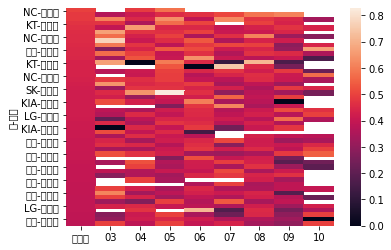

In [ ]:
# 먼저 기본이 되는 히트맵 만들기

import seaborn as sns
sns.heatmap(df_seclected)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0, flags=flags)


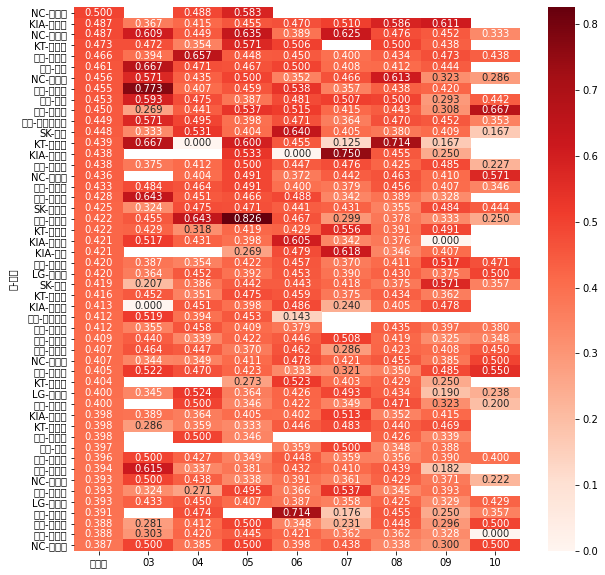

In [ ]:
# 그래프 크기, 색의 다양성, 정확한 수치 표현

fig, ax = plt.subplots( figsize=(10,10) ) # 그래프가 들어갈 도화지 크기 조정
sns.heatmap(df_seclected,
            annot = True, fmt = '.3f',
            cmap = 'Reds'
           )

# annot 숫자 나타내기 / fmt = 소수점 몇자리 까지 나타내기
# cmap = 컬러맵, 컬러 나타내기

In [ ]:
# 월별 출루율을 시즌 출루율 대비한 - + 값으로 벼녕하여, 월별 변화 정도를 살펴봄
# 시즌 전체 대비 월별 실적

df_seclected.columns

Index(['출루율', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object')

In [ ]:
for col in df_seclected.columns[1:]:
  df_seclected[col] = df_seclected[col] - df_seclected['출루율']

df_seclected['출루율'] = 0.0
df_seclected

,,출루율,03,04,05,06,07,08,09,10
팀,이름,,,,,,,,,
NC,나성범,0.0,NaN,-0.012195,0.083333,NaN,NaN,NaN,NaN,NaN
KIA,최형우,0.0,-0.120567,-0.072600,-0.031788,-0.017355,0.022570,0.098973,0.123877,NaN
NC,양의지,0.0,0.121949,-0.038029,0.148388,-0.097858,0.138253,-0.010557,-0.035134,-0.153414
KT,강백호,0.0,-0.000751,-0.118806,0.098456,0.033051,NaN,0.027027,-0.035473,NaN
키움,박병호,0.0,-0.071924,0.190853,-0.017947,-0.015863,-0.065863,-0.031520,0.006864,-0.028363
삼성,러프,0.0,0.205601,0.010363,0.005601,0.038934,-0.052615,-0.049301,-0.016621,NaN
NC,박석민,0.0,0.114964,-0.021682,0.043536,-0.104352,0.009289,0.156439,-0.133884,-0.170750
한화,최재훈,0.0,0.317484,-0.047836,0.004216,0.083219,-0.098100,-0.017743,-0.034953,NaN
키움,샌즈,0.0,0.140088,0.022743,-0.065712,0.028508,0.054742,0.047496,-0.159401,-0.010644


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0, flags=flags)


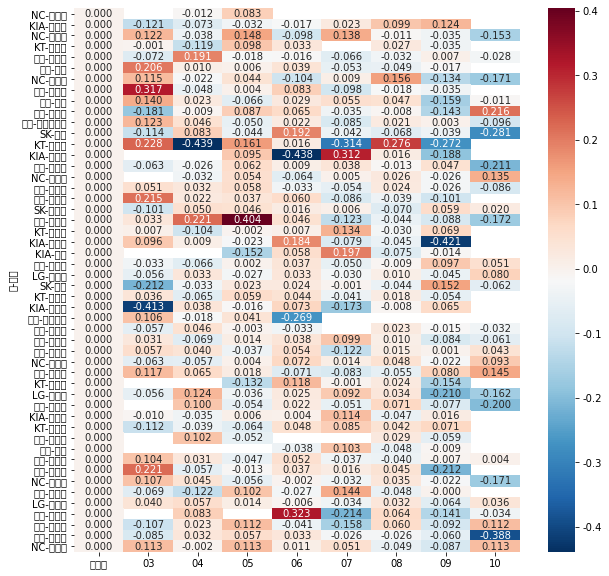

In [ ]:
# 시즌전체 대비 월별 출루율 증감 실적을 히트맵으로 표현
# 이번에는 컬러맵을 블루~ 레드로 나타내기 위해 RdBU_r 로 지정

fig, ax = plt.subplots( figsize = (10, 10))

sns.heatmap(df_seclected,
            annot = True, fmt = '.3f',
            cmap = 'RdBu_r') # _r을 빼거나 넣으면 색 위치가 뒤바뀜
# _r 은 리버스란 뜻임